In [6]:
import math
import collections
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import csv
import json

%matplotlib inline


from nba_api.stats.endpoints import playercareerstats

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

import pickle
import seaborn as sns


In [3]:
with open('mainScoringDFno20:25.pkl', 'rb') as f:
    mainDF = pickle.load(f) # deserialize using load()

In [4]:
mainDF


,Player_Name,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,George Gervin,76804,1980-81,00,1610612759,SAN,29.0,82,NaN,2765.0,...,0.826,126.0,293.0,419,260,94.0,56.0,251.0,212,2221
6,Moses Malone,77449,1980-81,00,1610612745,HOU,26.0,80,80.0,3245.0,...,0.757,474.0,706.0,1180,141,83.0,150.0,308.0,223,2222
4,Julius Erving,76681,1980-81,00,1610612755,PHL,31.0,82,NaN,2874.0,...,0.787,244.0,413.0,657,364,173.0,147.0,266.0,233,2014
11,Kareem Abdul-Jabbar,76003,1980-81,00,1610612747,LAL,34.0,80,80.0,2976.0,...,0.766,197.0,624.0,821,272,59.0,228.0,249.0,244,2095
4,Dan Issel,77097,1980-81,00,1610612743,DEN,32.0,80,NaN,2641.0,...,0.759,229.0,447.0,676,158,83.0,53.0,130.0,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Bradley Beal,203078,2021-22,00,1610612764,WAS,29.0,40,40.0,1439.0,...,0.833,38.0,151.0,189,265,36.0,15.0,135.0,95,928
8,Giannis Antetokounmpo,203507,2021-22,00,1610612749,MIL,27.0,67,67.0,2204.0,...,0.722,134.0,644.0,778,388,72.0,91.0,219.0,212,2002
6,Devin Booker,1626164,2021-22,00,1610612756,PHX,25.0,68,68.0,2345.0,...,0.868,45.0,297.0,342,329,77.0,26.0,162.0,180,1822
7,Julius Randle,203944,2021-22,00,1610612752,NYK,27.0,72,72.0,2544.0,...,0.756,125.0,591.0,716,370,53.0,39.0,245.0,205,1447


<Axes: >

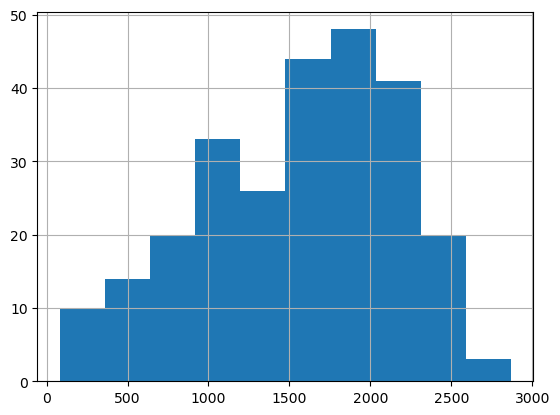

In [5]:
mainDF['PTS'].hist()

In [11]:
sns.histplot(data=mainDF, x = 'GP' > 20,y='PTS')


ValueError: invalid literal for int() with base 10: 'GP'

In [17]:
#faresClean = titanic_clean.loc[titanic_clean['Fare'] < 400]
mainDFCLEAN =mainDF.loc[mainDF['GP'] > 40]

<Axes: xlabel='GP', ylabel='PTS'>

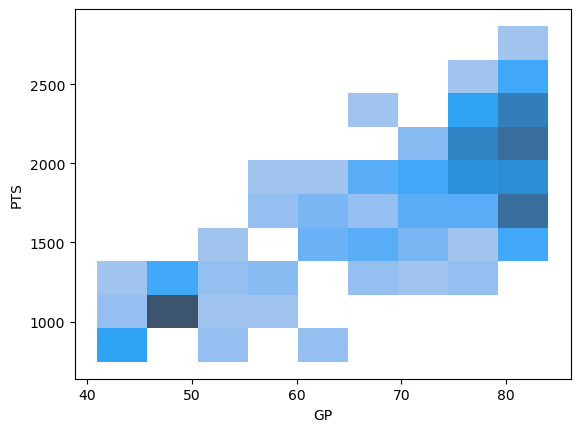

In [21]:
sns.histplot(data=mainDFCLEAN, x = 'GP',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

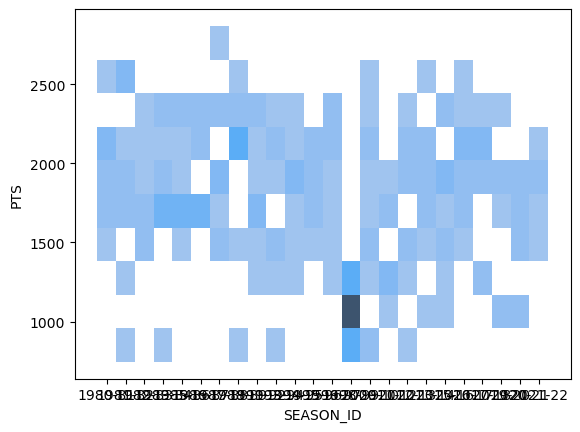

In [22]:
sns.histplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


<Axes: xlabel='SEASON_ID', ylabel='PTS'>

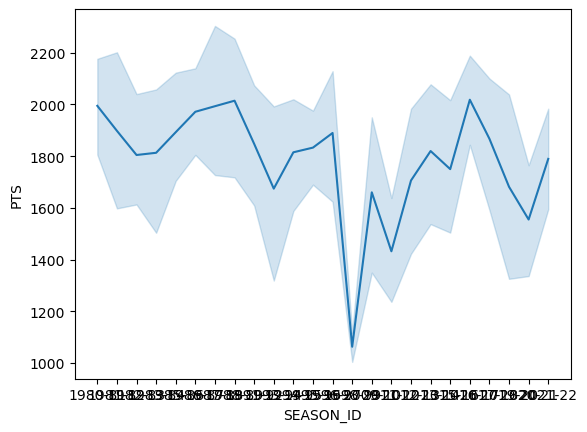

In [23]:
sns.lineplot(data=mainDFCLEAN, x = 'SEASON_ID',y='PTS')


In [24]:
# clears lockout sesaon

mainDFCLEANnolockout =mainDF.loc[mainDF['PTS'] > 1200]
